In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
age         2772 non-null int64
sex         2772 non-null object
bmi         2772 non-null float64
children    2772 non-null int64
smoker      2772 non-null object
region      2772 non-null object
charges     2772 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### There are no missing values as such

In [4]:
data['region'].value_counts().sort_values()

northeast    658
northwest    664
southwest    684
southeast    766
Name: region, dtype: int64

In [5]:
data['children'].value_counts().sort_values()

5      42
4      52
3     324
2     496
1     672
0    1186
Name: children, dtype: int64

### Converting Categorical Features to Numerical

In [6]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [7]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.492785,30.701349,1.101732,0.203463,1.530303,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.105489,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4687.797000
50%,39.000000,0.000000,30.447500,1.000000,0.000000,2.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


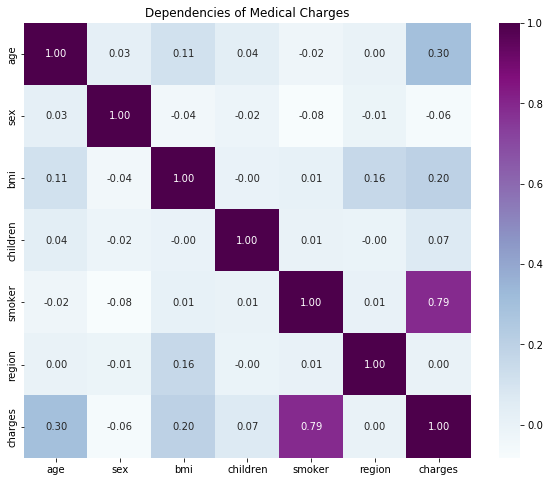

In [8]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./sampleImages/Cor')
plt.show()

### Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges.
We might drop these 3 columns as they have less correlation

In [9]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

female    1366
male      1406
Name: sex, dtype: int64
yes     564
no     2208
Name: smoker, dtype: int64
northeast    658
northwest    664
southwest    684
southeast    766
Name: region, dtype: int64


### Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA

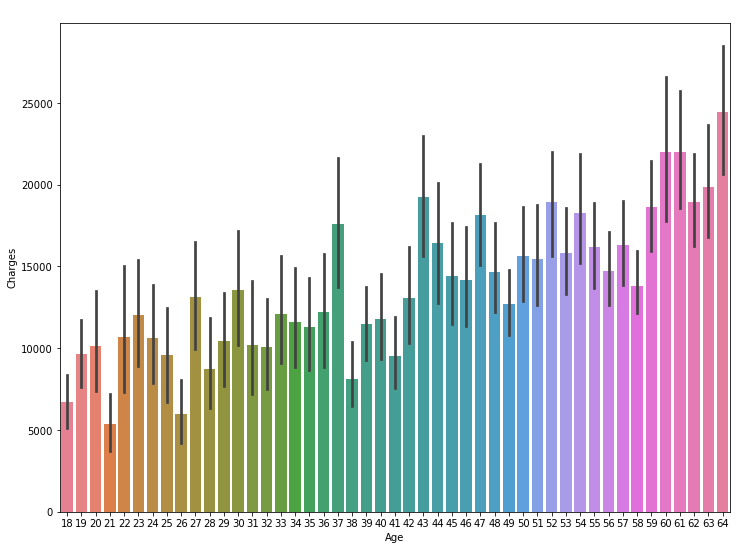

In [10]:
plt.figure(figsize=(12, 9))
plt.title('Age vs Charge', color='white')  # Set title color to white
sns.barplot(x='age', y='charges', data=data_copy, palette='husl')
plt.xlabel('Age', color='black')  # Set x-axis label color to white
plt.ylabel('Charges', color='black')  # Set y-axis label color to white
plt.xticks(color='black')  
plt.yticks(color='black') 
plt.savefig('./sampleImages/AgevsCharges', bbox_inches='tight')  
plt.show()

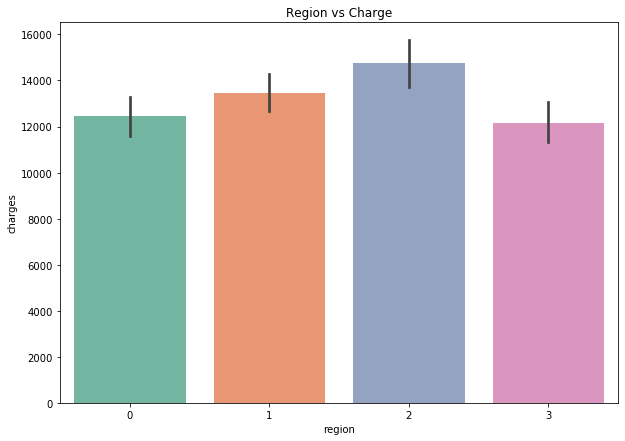

In [11]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set2')

Text(0.5, 1.0, 'BMI VS Charge')

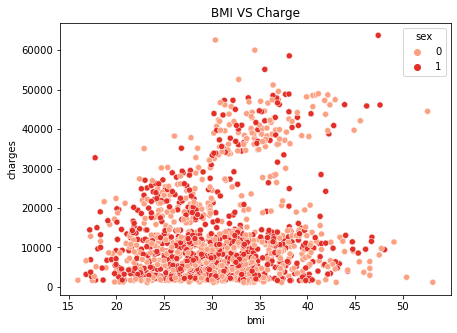

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

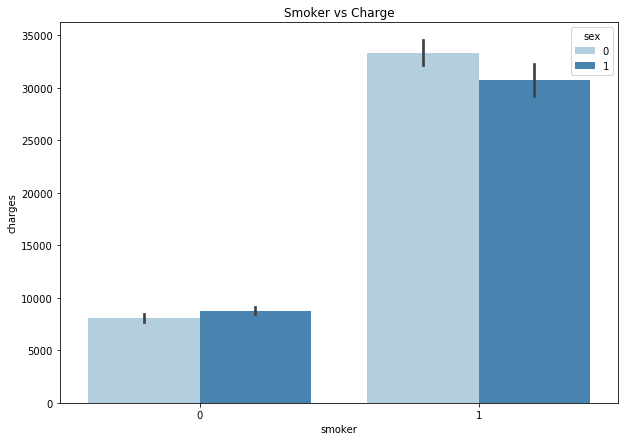

In [13]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

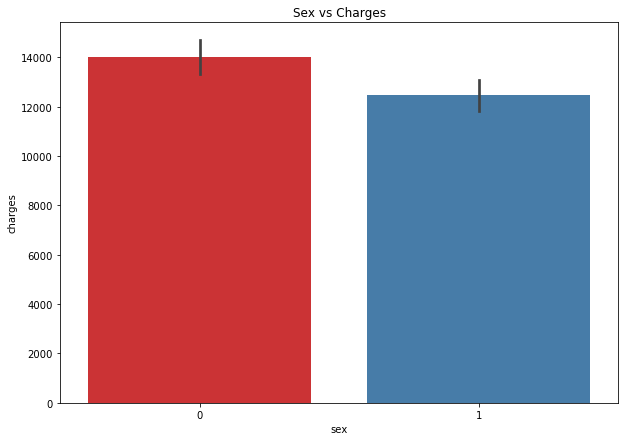

In [14]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

### Plotting the distributions

c:\Users\User\.conda\envs\medical\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

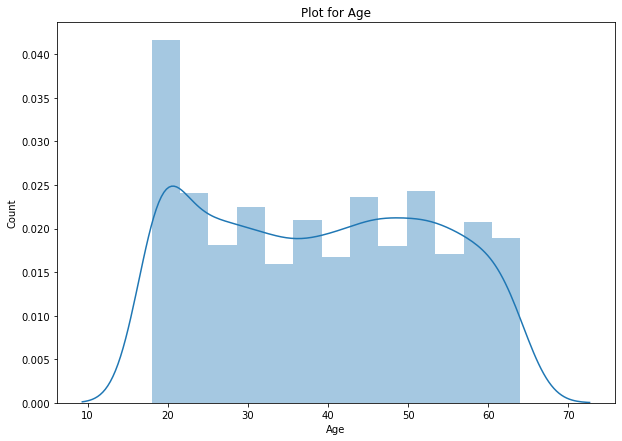

In [15]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

c:\Users\User\.conda\envs\medical\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

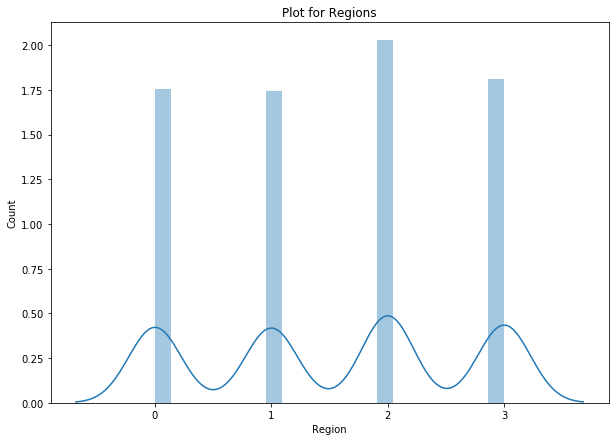

In [16]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['region'])
plt.title('Plot for Regions')
plt.xlabel('Region')
plt.ylabel('Count')

c:\Users\User\.conda\envs\medical\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

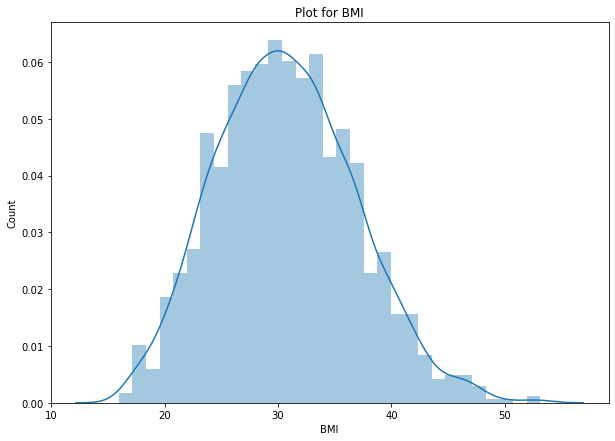

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

c:\Users\User\.conda\envs\medical\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

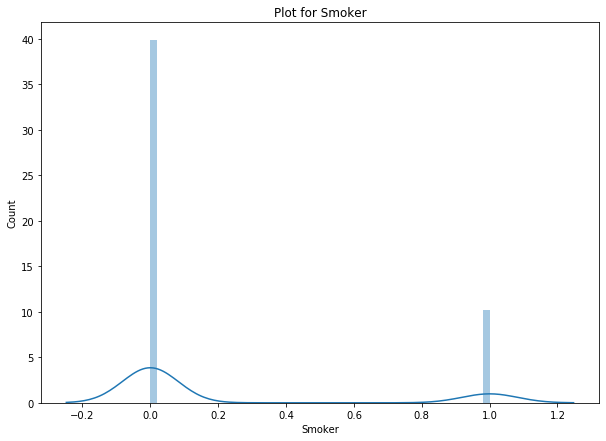

In [18]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['smoker'])
plt.title('Plot for Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

c:\Users\User\.conda\envs\medical\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

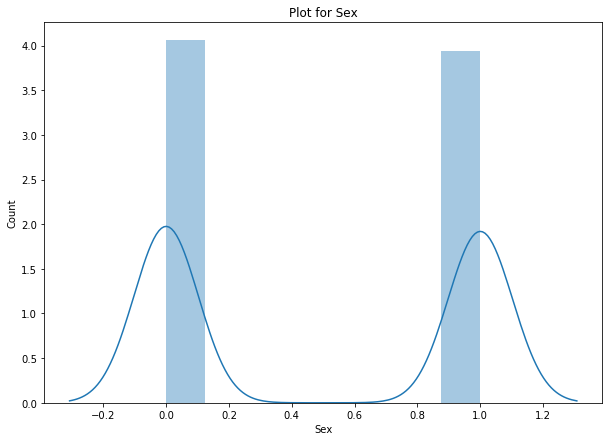

In [19]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['sex'])
plt.title('Plot for Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

c:\Users\User\.conda\envs\medical\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

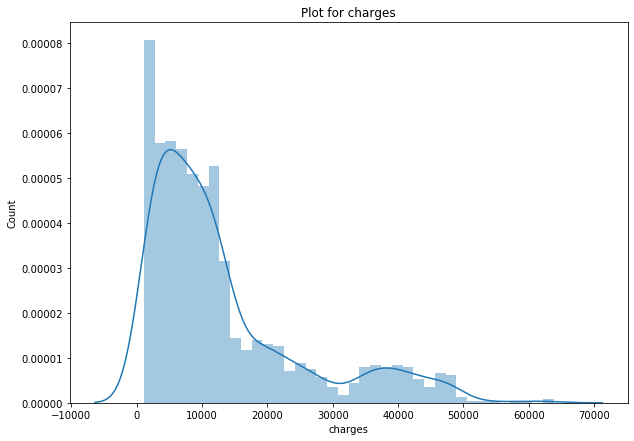

In [20]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

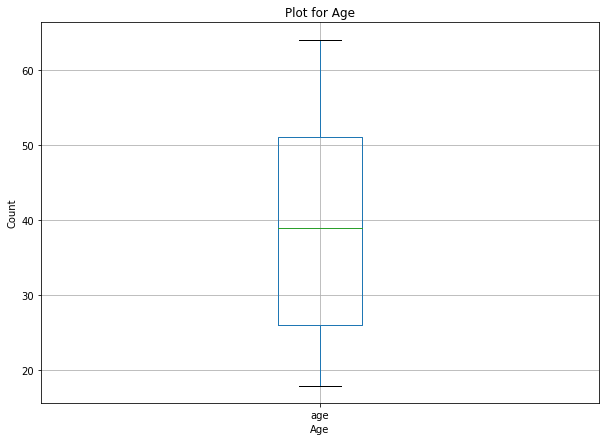

In [21]:
plt.figure(figsize=(10,7))
data_copy.boxplot(['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

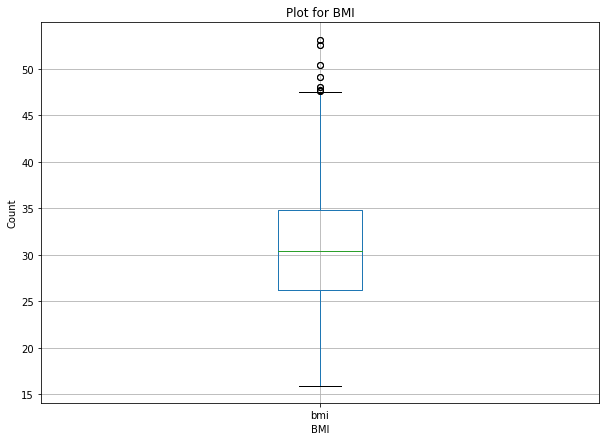

In [22]:
plt.figure(figsize=(10,7))
data_copy.boxplot(['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

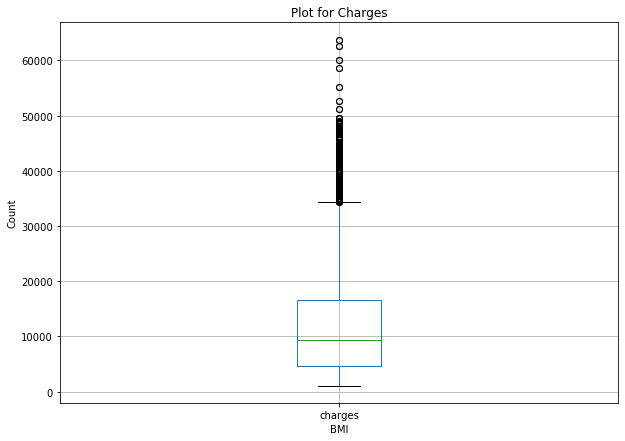

In [23]:
plt.figure(figsize=(10,7))
data_copy.boxplot(['charges'])
plt.title('Plot for Charges')
plt.xlabel('BMI')
plt.ylabel('Count')

### Prepating data - We can scale BMI and Charges Column before proceeding with Prediction

In [24]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.428353,1,-0.457114,0,1,3,0.298245
1,-1.499381,0,0.500731,1,0,2,-0.949483
2,-0.789099,0,0.375085,3,0,2,-0.725285
3,-0.433959,0,-1.304814,0,0,0,0.717976
4,-0.504987,0,-0.297201,0,0,0,-0.773238


In [25]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (2217, 6)
Size of y_train :  (2217, 1)
Size of X_test :  (555, 6)
Size of Y_test :  (555, 1)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

## Linear Regression

In [27]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.748
R2_score (train) : 0.753
R2_score (test) : 0.740
RMSE : 0.520


## Ridge Regressor

In [29]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

In [30]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [31]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

c:\Users\User\.conda\envs\medical\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.0269e-19): result may not be accurate.
  overwrite_a=True).T
c:\Users\User\.conda\envs\medical\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.33004e-20): result may not be accurate.
  overwrite_a=True).T


In [32]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(memory=None,
          steps=[('scalar',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('poly',
                  PolynomialFeatures(degree=2, include_bias=True,
                                     interaction_only=False, order='C')),
                 ('model',
                  Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
                        normalize=False, random_state=42, solver='auto',
                        tol=0.001))],
          verbose=False),
 0.8411478791324823)

In [33]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.841
R2 score (train) : 0.753
R2 score (test) : 0.740
RMSE : 0.513


## RandomForest Regressor

In [34]:
%%time
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

Wall time: 3min 13s


In [35]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

(0.8871333121740241,
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=60, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=7,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False))

In [36]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=12,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.887
R2 score (train) : 0.904
R2 score (test) : 0.862
RMSE : 0.371


# K-Nearest Neighbour

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train_scaled, y_train_scaled.ravel())

k_range = list(range(1, 100))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

knn_gscv = GridSearchCV(knn, param_grid, cv=10, scoring='r2', n_jobs=-1)
knn_gscv = knn_gscv.fit(X_train_scaled, y_train_scaled.ravel())

cv_knn = knn_gscv.best_score_
pred = knn_gscv.predict(X_test_scaled)

error = sqrt(mean_squared_error(y_test_scaled, pred))
score1 = knn_gscv.score(X_train_scaled, y_train_scaled.ravel())
score2 = knn_gscv.score(X_test_scaled, y_test_scaled.ravel())

print('CV R2 score: {0:.3f}'.format(cv_knn))
print(f"R2 score (train): {score1}")
print(f"R2 score (test): {score2}")
print(f"RMSE error is: {error}")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}
CV R2 score: 0.929
R2 score (train): 0.9995174532796426
R2 score (test): 0.9349452012020256
RMSE error is: 0.2550584223231501


In [75]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('KNN', error, score1, score2, cv_knn.mean())   
         ]

In [76]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.520119,0.752932,0.739820,0.748018
1,Ridge Regression,0.513418,0.752870,0.740083,0.841148
2,Random Forest Regression,0.370910,0.903589,0.862425,0.887133
3,KNN,0.255058,0.999517,0.934945,0.928671


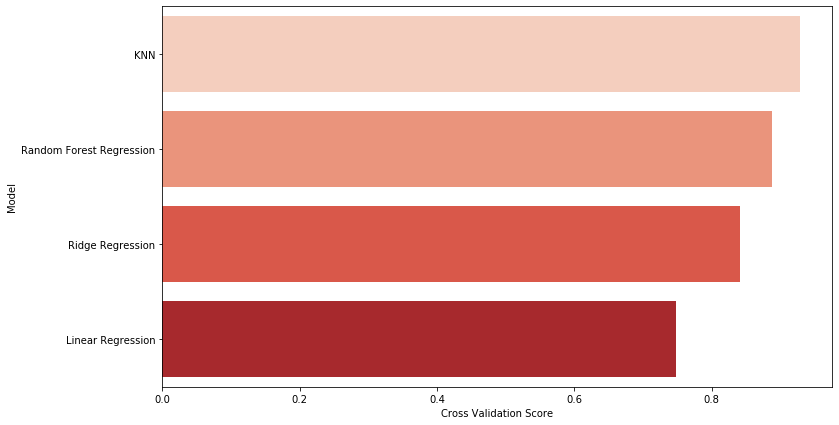

In [77]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [78]:
import pickle

Pkl_Filename = "knn_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)

In [79]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)

In [80]:
rf_tuned_loaded

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [81]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

In [82]:
print('{0:.3f}'.format(pred))

-0.102


In [83]:
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [84]:
knn_gscv.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')